In [33]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import xskillscore as xs
from scipy.stats import kendalltau

In [34]:
nct.deep_clean()

In [35]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [36]:
variable = "tos"
print(variable)
model = "ACCESS-ESM1-5"
print(model)
experiment = "ssp585"
print(experiment)
freq = "Omon"
print(freq)
name = "Surface temperature"

tos
ACCESS-ESM1-5
ssp585
Omon


In [5]:
nc = Dataset("Data/Raw/tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc")
unit = getattr(nc.variables[variable], "units")
unit

'degC'

## Interpolation

In [6]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)

tos_Omon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn_201501-210012.nc
tos_Omon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn_210101-230012.nc


tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc


In [7]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/tos_Omon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (360x300) to lonlat (360x180) grid, with source mask (69782)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 1032 timesteps.
cdo    remapdis: Processed 111456000 values from 1 variable over 1032 timesteps [12.95s 233MB].


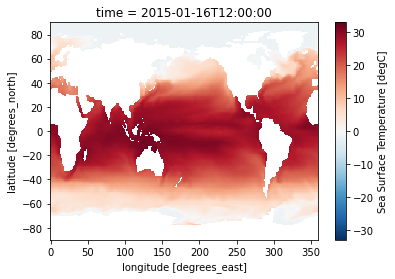

In [8]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [9]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (360x300) to lonlat (360x180) grid, with source mask (69782)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 1980 timesteps.
cdo    remapdis: Processed 213840000 values from 1 variable over 1980 timesteps [26.18s 245MB].


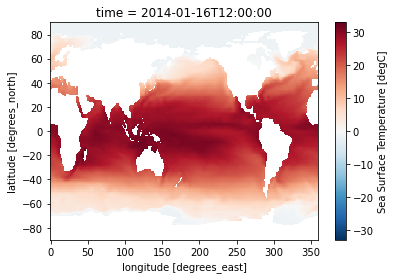

In [10]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## Sea ice selection

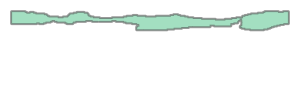

In [6]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [7]:
ice = gpd.GeoSeries(shape['geometry'][0])

### ssp585

In [13]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    tos      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:32 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/39125f03-b0c7-4cb1-95fd-72e6b2114417
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [14]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    tos          (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:32 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/39125f03-b0c7-4cb1-95fd-72e6b2114417
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [15]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

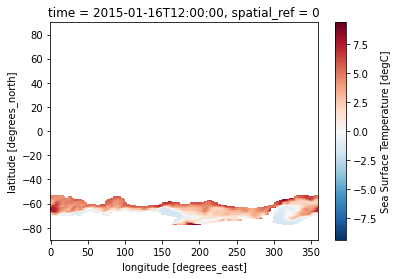

In [16]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [17]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### historical


In [8]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1980, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    tos      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:49 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/02850fcc-be64-40de-b7ca-9b8aa6e688a0
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [9]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1980, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    tos          (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:49 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/02850fcc-be64-40de-b7ca-9b8aa6e688a0
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [10]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

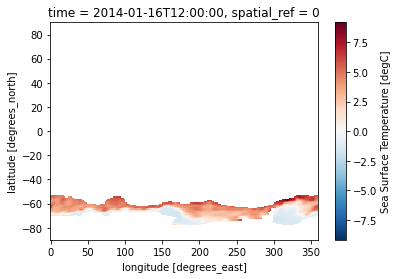

In [11]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [12]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## 20 year of sea ice area - Kelvin

### historical

In [37]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1980)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    tos          (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:49 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/02850fcc-be64-40de-b7ca-9b8aa6e688a0
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [38]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped = historical_cropped + 273.15
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:49 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/02850fcc-be64-40de-b7ca-9b8aa6e688a0
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [39]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

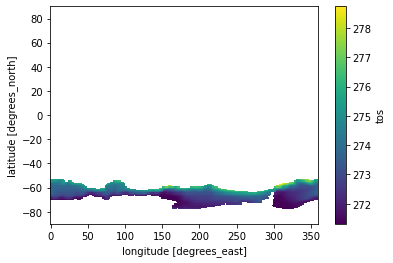

In [40]:
historical_mean[variable].plot()

In [41]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [42]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [43]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [44]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [45]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [46]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter.nc".format(variable, model), mode = "w", format = "NETCDF4")

### ssp585

In [47]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    tos          (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:32 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/39125f03-b0c7-4cb1-95fd-72e6b2114417
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [48]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped = new_cropped + 273.15
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:32 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/39125f03-b0c7-4cb1-95fd-72e6b2114417
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [49]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

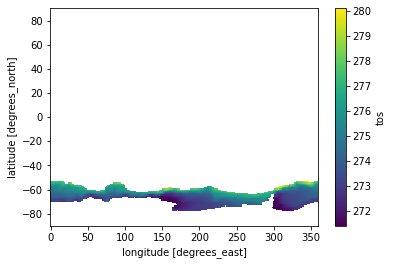

In [50]:
new_mean[variable].plot()

In [51]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [52]:
new_median = new_cropped.median(["lat","lon"])
new_median

<xarray.Dataset>
Dimensions:  (time: 240)
Coordinates:
  * time     (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    tos      (time) float32 276.7 277.4 276.5 275.2 ... 271.6 271.6 272.3 274.7

#### Season

In [53]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [54]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [55]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [56]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [57]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [58]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [59]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

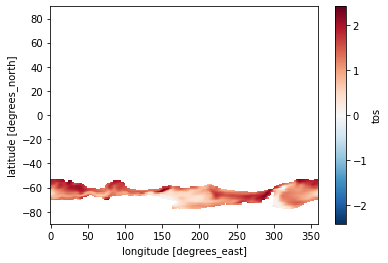

In [60]:
difference = new - historical
difference[variable].plot()
difference

In [61]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

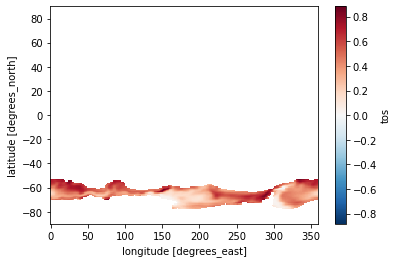

In [62]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [63]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summer

In [64]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

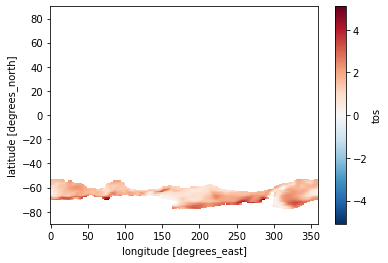

In [65]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [66]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

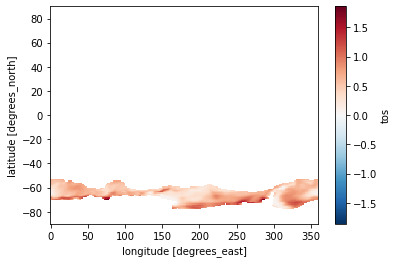

In [67]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [68]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [69]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

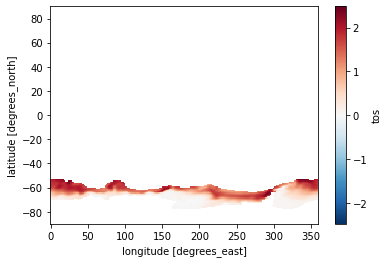

In [70]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [71]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

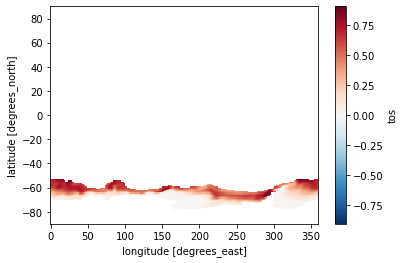

In [72]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [73]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Summary values

In [74]:
mean = (percentage.mean())[variable].values
median = (percentage.median())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
median_abs = (difference.median())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean, mean_abs, median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = 0.41722816228866577% 1.141611099243164
Median change = 0.42008477449417114% 1.1465911865234375
Max inc = 0.8830530643463135% 2.41650390625
Max dec = -0.05494089052081108% -0.1510009765625


In [53]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                           mean, mean_abs, 
                                                                                                                           median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

#### Season

In [75]:
mean_summer = (percentage_summer.mean())[variable].values
median_summer = (percentage_summer.median())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values


mean_abs_summer = (difference_summer.mean())[variable].values
median_abs_summer = (difference_summer.median())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [76]:
mean_winter = (percentage_winter.mean())[variable].values
median_winter = (percentage_winter.median())[variable].values
max_value_winter = (percentage_winter.max())[variable].values
min_value_winter = (percentage_winter.min())[variable].values

mean_abs_winter = (difference_winter.mean())[variable].values
median_abs_winter = (difference_winter.median())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values

In [56]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nSummer:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                                    median_summer, median_abs_summer,
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [57]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                                     median_winter, median_abs_winter,
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## 20 year of sea ice area - Celsius

### historical

In [7]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1980)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    tos          (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:49 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/02850fcc-be64-40de-b7ca-9b8aa6e688a0
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [8]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped = historical_cropped 
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
Data variables:
    tos      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:49 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/02850fcc-be64-40de-b7ca-9b8aa6e688a0
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [9]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

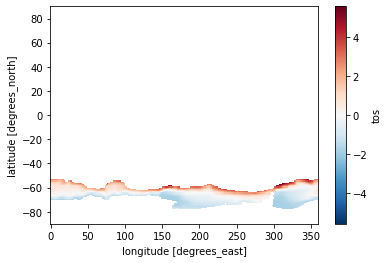

In [10]:
historical_mean[variable].plot()

#### Season

In [11]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [12]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer = historical_summer.mean("time")
historical_summer

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [13]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))
historical_winter = historical_winter.mean("time")

### ssp585

In [14]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    tos          (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:32 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/39125f03-b0c7-4cb1-95fd-72e6b2114417
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [15]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped = new_cropped 
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    tos      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 13:20:32 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/39125f03-b0c7-4cb1-95fd-72e6b2114417
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [16]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

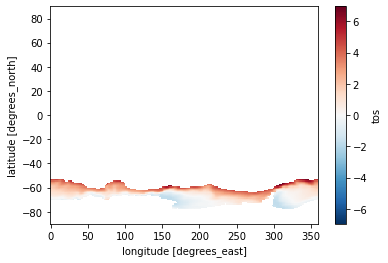

In [17]:
new_mean[variable].plot()

#### Season

In [18]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [19]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [20]:
new_summer = new_summer.mean("time")


In [21]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [22]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

### 20 year Difference 

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

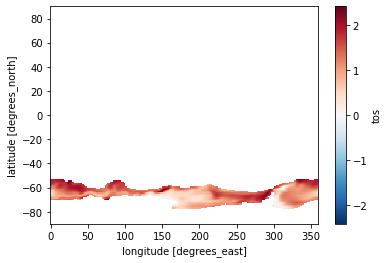

In [23]:
difference = new_mean - historical_mean
difference[variable].plot()
difference

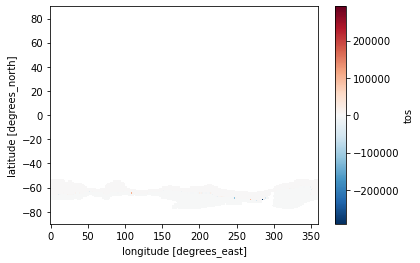

In [24]:
percentage = (difference/historical_mean)*100
percentage[variable].plot()

In [25]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage_celsius.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summer

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

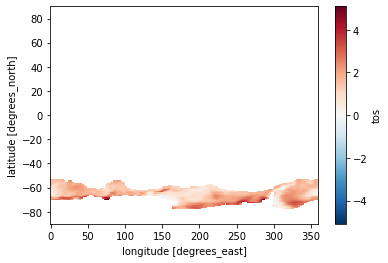

In [26]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

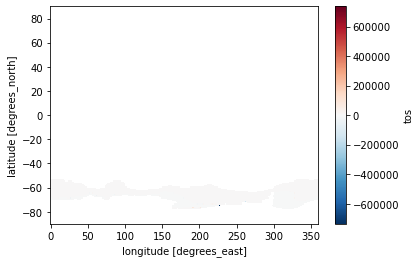

In [27]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

#### Winter


<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

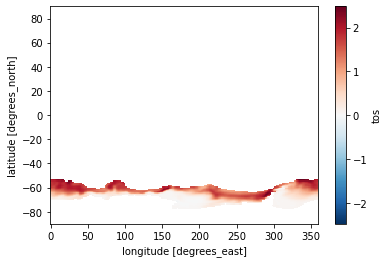

In [28]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

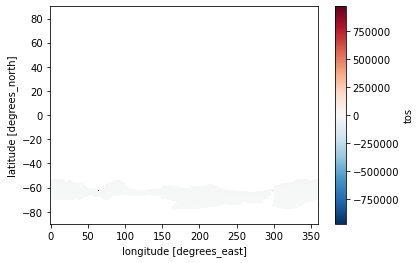

In [29]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

### Summary values

In [30]:
mean = (percentage.mean())[variable].values
median = (percentage.median())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
median_abs = (difference.median())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean, mean_abs, median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = -44.42741775512695% 1.1416101455688477
Median change = -9.82131576538086% 1.1465693712234497
Max inc = 106779.5625% 2.416525363922119
Max dec = -291222.84375% -0.1509706974029541


In [30]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                           mean, mean_abs, 
                                                                                                                           median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

#### Season

In [31]:
mean_summer = (percentage_summer.mean())[variable].values
median_summer = (percentage_summer.median())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values


mean_abs_summer = (difference_summer.mean())[variable].values
median_abs_summer = (difference_summer.median())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [32]:
mean_winter = (percentage_winter.mean())[variable].values
median_winter = (percentage_winter.median())[variable].values
max_value_winter = (percentage_winter.max())[variable].values
min_value_winter = (percentage_winter.min())[variable].values

mean_abs_winter = (difference_winter.mean())[variable].values
median_abs_winter = (difference_winter.median())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values

In [33]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nSummer:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                                    median_summer, median_abs_summer,
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [34]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                                     median_winter, median_abs_winter,
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## Zonal Absolute/Percentage Change

In [77]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

#### Increasing

In [78]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    tos          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

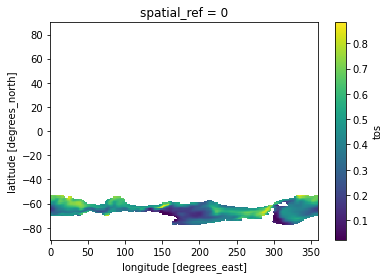

In [79]:
inc_area[variable].plot()

In [80]:
inc_area.to_netcdf(path = "Data/{}_{}_percentage_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [81]:
ab = xarray.open_dataset("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))

ab.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ab.rio.write_crs("epsg:4326", inplace=True)

ab_inc_area = ab.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    tos          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

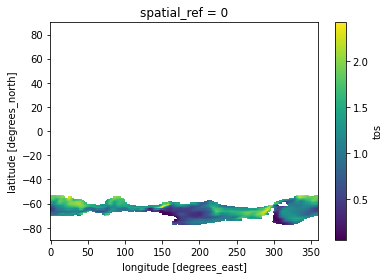

In [82]:
ab_inc_area[variable].plot()

In [83]:
ab_inc_area.to_netcdf(path = "Data/{}_{}_absolute_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [96]:
inc_mean = (inc_area.mean())[variable].values
inc_median = (inc_area.median())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

inc_mean_abs = (ab_inc_area.mean())[variable].values
inc_median_abs = (ab_inc_area.median())[variable].values
inc_max_value_abs = (ab_inc_area.max())[variable].values
inc_min_value_abs = (ab_inc_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))

Mean change = 0.4194163680076599% 1.1476006507873535
 Max inc = 0.8830530643463135% 2.41650390625
 Max dec = 0.022390983998775482% 0.060760498046875



In [66]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                                                                                  inc_median, inc_median_abs,
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))
summary.close()

#### Decreasing

In [84]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    tos          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

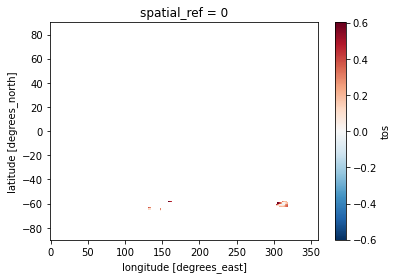

In [85]:
dec_area[variable].plot()

In [86]:
dec_area.to_netcdf(path = "Data/{}_{}_percentage_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [87]:
ab_dec_area = ab.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    tos          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

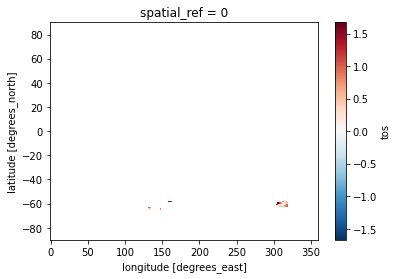

In [88]:
ab_dec_area[variable].plot()

In [89]:
ab_dec_area.to_netcdf(path = "Data/{}_{}_absolute_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [90]:
dec_mean = (dec_area.mean())[variable].values
dec_median = (dec_area.median())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

dec_mean_abs = (ab_dec_area.mean())[variable].values
dec_median_abs = (ab_dec_area.median())[variable].values
dec_max_value_abs = (ab_dec_area.max())[variable].values
dec_min_value_abs = (ab_dec_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))

Mean change = 0.2303251028060913% 0.6332259178161621
 Max inc = 0.6008954644203186% 1.67034912109375
 Max dec = -0.05494089052081108% -0.1510009765625



In [74]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                                                                                dec_median, dec_median_abs,
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))
summary.close()

In [91]:
data = {'Model' : model,
        'Variable' : name,
        'Percentage change' : [median],
        'Absolute change' : [median_abs]}
df = pd.DataFrame(data)
df

,Model,Variable,Percentage change,Absolute change
0,ACCESS-ESM1-5,Surface temperature,0.42008477449417114,1.1465911865234375


In [92]:
df.to_csv("csv/Whole_change.csv", mode = "a", index = False, header=False)

In [93]:
data = {'Model' : [model, model],
        'Variable' : [name, name],
        'Percentage change' : [median_summer, median_winter],
        'Absolute change' : [median_abs_summer, median_abs_winter],
       "Season" : ["Summer", "Winter"]}
df = pd.DataFrame(data)
df

,Model,Variable,Percentage change,Absolute change,Season
0,ACCESS-ESM1-5,Surface temperature,0.5710636377334595,1.5769195556640625,Summer
1,ACCESS-ESM1-5,Surface temperature,0.2986866235733032,0.8106231689453125,Winter


In [94]:
df.to_csv("csv/Season_change.csv", mode = "a", index = False, header=False)

In [97]:
data = {'Model' : [model, model],
        'Variable' : [name, name],
        'Percentage change' : [inc_median, dec_median],
        'Absolute change' : [inc_median_abs, dec_median_abs],
       "Zone" : ["Inc", "Dec"]}
df = pd.DataFrame(data)
df

,Model,Variable,Percentage change,Absolute change,Zone
0,ACCESS-ESM1-5,Surface temperature,0.4215584099292755,1.150421142578125,Inc
1,ACCESS-ESM1-5,Surface temperature,0.20598208904266357,0.5616607666015625,Dec


In [98]:
df.to_csv("csv/Zone_change.csv", mode = "a", index = False, header=False)

## Zonal Absolute/Percentage Change - Celsius

In [36]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

#### Increasing

In [37]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_celsius.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    tos          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

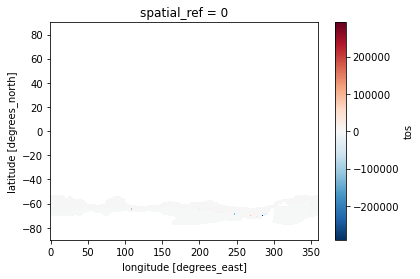

In [38]:
inc_area[variable].plot()

In [39]:
inc_mean = (inc_area.mean())[variable].values
inc_median = (inc_area.median())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

In [40]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone median change = {}%".format(inc_median))
summary.close()

#### Decreasing

In [41]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    tos          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

In [42]:
dec_mean = (dec_area.mean())[variable].values
dec_median = (dec_area.median())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

In [43]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone median change = {}%".format(dec_median))
summary.close()

## Absolute map

##### Mapping

In [50]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

In [ ]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))



<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 ...

In [ ]:
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

In [76]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

#var_old = np.nanmean(var_old, axis = 0) 

old_max = np.nanmax(var_old)
old_min = np.nanmin(var_old)
print(old_max, old_min)


var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

278.73618 271.31308


In [77]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

#var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

280.1091 271.409


In [78]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

280.1091 271.31308


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

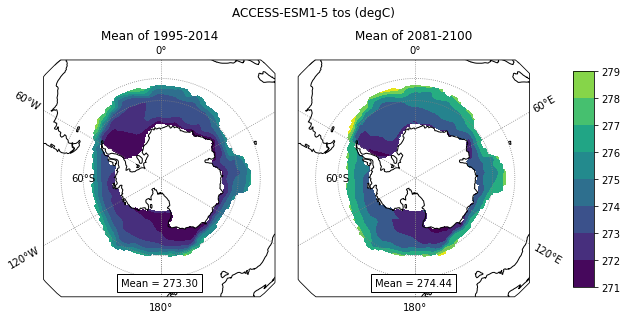

In [79]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('Mean of 1995-2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2f}".format(old.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('Mean of 2081-2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2f}".format(new.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_2014vs2100.png".format(model, variable, model))

plt.show()

## Percentage Change map

In [86]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_celsius.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 ...

In [87]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

628.9880126953125 -566.0108642578125
106779.56 -291222.84


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

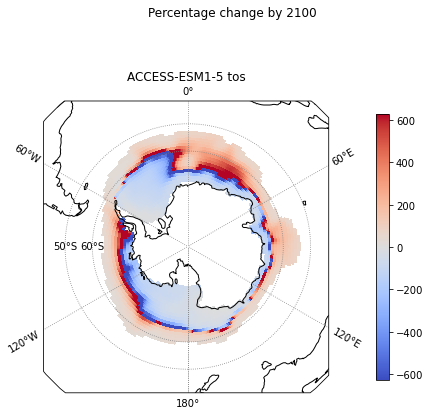

In [88]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

## Correlation with epc100

### Whole


In [44]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), decode_coords="all")
exp_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage.nc".format(model, experiment), decode_coords="all")

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['depth_bnds']


In [45]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(-0.21756804)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [46]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(4.28749395e-52)

In [47]:
export = 98.8232822021433

In [90]:
cor_ken, cor_ken_p = kendalltau(current_per.values, exp_per.values, nan_policy="omit")
print(cor_ken, cor_ken_p)

-0.18093794633746543 3.648883642616435e-78


In [91]:
data = {'Percentage': [median], 
        'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Kendall': [cor_ken], 
        'p_value_k': [cor_ken_p],
        'Variable': name,
        'Model': model,
        'Export': [export]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export
0,0.42008477449417114,-0.21756803635513533,4.287633352088832e-52,-0.180938,3.648884e-78,Surface temperature,ACCESS-ESM1-5,98.823282


In [92]:
df.to_csv("csv/Whole.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [93]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/epc100_{}_percentage_inc.nc".format(model), decode_coords="all")

In [94]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(-0.22123307)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [95]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(1.53510815e-53)

In [96]:
cor_ken_inc, cor_ken_p_inc = kendalltau(current_inc_per.values, exp_inc_per.values, nan_policy="omit")
print(cor_ken_inc, cor_ken_p_inc)

-0.19297915789023065 3.8365236813829536e-88


#### Dec

In [97]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/epc100_{}_percentage_dec.nc".format(model), decode_coords="all")

In [98]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.50247332)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [99]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(1.11421982e-06)

In [100]:
cor_ken_dec, cor_ken_p_dec = kendalltau(current_dec_per.values, exp_dec_per.values, nan_policy="omit")
print(cor_ken_dec, cor_ken_p_dec)

0.3958691910499139 9.764096642578646e-08


In [101]:
data = {'Percentage': [inc_median, dec_median],
        'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Kendall': [cor_ken_inc, cor_ken_dec], 
        'p_value_k': [cor_ken_p_inc, cor_ken_p_dec],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone
0,0.4215584099292755,-0.22123307045219506,1.5351081485458733e-53,-0.192979,3.836524e-88,Surface temperature,ACCESS-ESM1-5,inc
1,0.20598208904266357,0.5024733200604897,1.1142198179820325e-06,0.395869,9.764097e-08,Surface temperature,ACCESS-ESM1-5,dec


In [102]:
df.to_csv("csv/Zone.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [103]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

In [104]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(-0.13871837)
Coordinates:
    depth    float64 100.0

In [105]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(7.00872911e-22)

In [106]:
cor_ken_summer, cor_ken_p_summer = kendalltau(current_summer_per.values, exp_summer_per.values, nan_policy="omit")
print(cor_ken_summer, cor_ken_summer)

0.2800585656141167 0.2800585656141167


#### Winter

In [107]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [108]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(-0.10384228)
Coordinates:
    depth    float64 100.0

In [109]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(6.91266916e-13)

In [110]:
cor_ken_winter, cor_ken_p_winter = kendalltau(current_winter_per.values, exp_winter_per.values, nan_policy="omit")
print(cor_ken_winter, cor_ken_p_winter)

-0.4356816740795226 0.0


In [111]:
data = {'Percentage_summer': [median_summer, median_winter],
        'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Kendall': [cor_ken_summer, cor_ken_winter], 
        'p_value_k': [cor_ken_p_summer, cor_ken_p_winter],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]
       }
df = pd.DataFrame(data)
df

,Percentage_summer,Correlation_summer,p-value_summer,Kendall,p_value_k,Variable,Model,Season
0,0.5710636377334595,-0.13871837200630746,7.008729105260072e-22,0.280059,1.602775e-184,Surface temperature,ACCESS-ESM1-5,summer
1,0.2986866235733032,-0.10384228359624278,6.912669157169744e-13,-0.435682,0.000000e+00,Surface temperature,ACCESS-ESM1-5,winter


In [112]:
df.to_csv("csv/Season.csv", mode = "a", index = False, header=False)

## Correlation with siconc

### Whole


In [44]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/siconc_{}_{}_percentage.nc".format(model, experiment), decode_coords="all")

In [45]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(-0.78448668)

In [46]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(0.)

In [47]:
cor_ken, cor_ken_p = kendalltau(current_per.values, exp_per.values, nan_policy="omit")
print(cor_ken, cor_ken_p)

-0.5970162781553349 0.0


In [48]:
data = {'Percentage':[median],
        'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model,
       'Correlation_ice_k': [cor_ken],
        'p-value_ice_k': [cor_ken_p]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Variable,Model,Correlation_ice_k,p-value_ice_k
0,-9.82131576538086,-0.7844866819975583,0.0,Surface temperature,ACCESS-ESM1-5,-0.597016,0.0


In [49]:
df.to_csv("csv/Whole_ice_epc100.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [50]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/siconc_{}_percentage_inc.nc".format(model), decode_coords="all")

In [51]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(-0.78086191)
Coordinates:
    spatial_ref  int64 0

In [52]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(0.)

In [53]:
cor_ken_inc, cor_ken_p_inc = kendalltau(current_inc_per.values, exp_inc_per.values, nan_policy="omit")
print(cor_ken_inc, cor_ken_p_inc)

-0.5929584310809214 0.0


#### Dec

In [54]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/siconc_{}_percentage_dec.nc".format(model), decode_coords="all")

In [55]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(-0.8185541)
Coordinates:
    spatial_ref  int64 0

In [56]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(1.9300326e-21)

In [57]:
cor_ken_dec, cor_ken_p_dec = kendalltau(current_dec_per.values, exp_dec_per.values, nan_policy="omit")
print(cor_ken_dec, cor_ken_p_dec)

-0.6775674125071716 7.199369489009555e-20


In [58]:
data = {'Percentage': [inc_median, dec_median],
        'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"],
       'Correlation_ice_k': [cor_ken_inc, cor_ken_dec],
        'p-value_ice_k': [cor_ken_p_inc, cor_ken_p_dec]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k
0,-11.116325378417969,-0.7808619091673642,0.0,Surface temperature,ACCESS-ESM1-5,inc,-0.592958,0.000000e+00
1,18.30488395690918,-0.818554101321937,1.9300326017816204e-21,Surface temperature,ACCESS-ESM1-5,dec,-0.677567,7.199369e-20


In [59]:
df.to_csv("csv/Zone_ice_epc100.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [60]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/siconc_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

In [61]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(-0.25517237)

In [62]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(7.18541675e-72)

In [63]:
cor_ken_summer, cor_ken_p_summer = kendalltau(current_summer_per.values, exp_summer_per.values, nan_policy="omit")
print(cor_ken_summer, cor_ken_summer)

-0.0943808750373706 -0.0943808750373706


#### Winter

In [64]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/siconc_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [65]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(-0.90368066)

In [66]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(0.)

In [67]:
cor_ken_winter, cor_ken_p_winter = kendalltau(current_winter_per.values, exp_winter_per.values, nan_policy="omit")
print(cor_ken_winter, cor_ken_p_winter)

-0.8006470399449022 0.0


In [68]:
data = {'Percentage_summer': [median_summer, median_winter],
        'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"],
        'Correlation_ice_k': [cor_ken_summer, cor_ken_winter],
        'p-value_ice_k': [cor_ken_p_summer, cor_ken_p_winter]
       }
df = pd.DataFrame(data)
df

,Percentage_summer,Correlation_summer,p-value_summer,Variable,Model,Season,Correlation_ice_k,p-value_ice_k
0,40.37031555175781,-0.25517237115613484,7.185416754281365e-72,Surface temperature,ACCESS-ESM1-5,summer,-0.094381,1.529616e-22
1,-15.445880889892578,-0.9036806642436896,0.0,Surface temperature,ACCESS-ESM1-5,winter,-0.800647,0.000000e+00


In [69]:
df.to_csv("csv/Season_ice_epc100.csv", mode = "a", index = False, header=False)

## Correlation with NPP

### Whole


In [70]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage.nc".format(model, experiment), decode_coords="all")

In [71]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(-0.27920602)

In [72]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(3.00364645e-86)

In [73]:
cor_ken, cor_ken_p = kendalltau(current_per.values, exp_per.values, nan_policy="omit")
print(cor_ken, cor_ken_p)

-0.1471111357056781 1.7942271982832123e-52


In [74]:
data = {'Percentage':[median],
        'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model,
       'Correlation_ice_k': [cor_ken],
        'p-value_ice_k': [cor_ken_p]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Variable,Model,Correlation_ice_k,p-value_ice_k
0,-9.82131576538086,-0.27920602215742213,3.0036464499849213e-86,Surface temperature,ACCESS-ESM1-5,-0.147111,1.794227e-52


In [75]:
df.to_csv("csv/Whole_npp_epc100.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [76]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/intpp_{}_percentage_inc.nc".format(model), decode_coords="all")

In [77]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(-0.28494603)
Coordinates:
    spatial_ref  int64 0

In [78]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(2.929969e-89)

In [79]:
cor_ken_inc, cor_ken_p_inc = kendalltau(current_inc_per.values, exp_inc_per.values, nan_policy="omit")
print(cor_ken_inc, cor_ken_p_inc)

-0.157196816815411 3.111323800201232e-59


#### Dec

In [80]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/intpp_{}_percentage_dec.nc".format(model), decode_coords="all")

In [81]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.49450115)
Coordinates:
    spatial_ref  int64 0

In [82]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(1.74449795e-06)

In [83]:
cor_ken_dec, cor_ken_p_dec = kendalltau(current_dec_per.values, exp_dec_per.values, nan_policy="omit")
print(cor_ken_dec, cor_ken_p_dec)

0.4394721744119334 3.2538592201429604e-09


In [84]:
data = {'Percentage': [inc_median, dec_median],
        'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"],
       'Correlation_ice_k': [cor_ken_inc, cor_ken_dec],
        'p-value_ice_k': [cor_ken_p_inc, cor_ken_p_dec]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k
0,-11.116325378417969,-0.28494603372593635,2.929969004007632e-89,Surface temperature,ACCESS-ESM1-5,inc,-0.157197,3.111324e-59
1,18.30488395690918,0.4945011529712271,1.7444979474411166e-06,Surface temperature,ACCESS-ESM1-5,dec,0.439472,3.253859e-09


In [85]:
df.to_csv("csv/Zone_npp_epc100.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [86]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

In [87]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(-0.16493186)

In [88]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(1.78460031e-30)

In [89]:
cor_ken_summer, cor_ken_p_summer = kendalltau(current_summer_per.values, exp_summer_per.values, nan_policy="omit")
print(cor_ken_summer, cor_ken_summer)

0.3094649784230909 0.3094649784230909


#### Winter

In [90]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [91]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(-0.37411384)

In [92]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(1.52585592e-158)

In [93]:
cor_ken_winter, cor_ken_p_winter = kendalltau(current_winter_per.values, exp_winter_per.values, nan_policy="omit")
print(cor_ken_winter, cor_ken_p_winter)

-0.3835194464258226 0.0


In [94]:
data = {'Percentage_summer': [median_summer, median_winter],
        'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"],
        'Correlation_ice_k': [cor_ken_summer, cor_ken_winter],
        'p-value_ice_k': [cor_ken_p_summer, cor_ken_p_winter]
       }
df = pd.DataFrame(data)
df

,Percentage_summer,Correlation_summer,p-value_summer,Variable,Model,Season,Correlation_ice_k,p-value_ice_k
0,40.37031555175781,-0.16493185917834652,1.7846003092379387e-30,Surface temperature,ACCESS-ESM1-5,summer,0.309465,1.220739e-225
1,-15.445880889892578,-0.37411383705551726,1.5258559215438526e-158,Surface temperature,ACCESS-ESM1-5,winter,-0.383519,0.000000e+00


In [95]:
df.to_csv("csv/Season_npp_epc100.csv", mode = "a", index = False, header=False)

## Correlation with epc100

### Whole


In [5]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/epc100_{}_{}_absolute.nc".format(model, experiment), decode_coords="all")

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['depth_bnds']


In [6]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.274035)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [7]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(9.68586493e-83)

In [8]:
data = {'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model
0,0.27403500151745586,9.685864934455285e-83,Surface temperature,ACCESS-ESM1-5


In [9]:
df.to_csv("csv/Whole_absolute_export.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [10]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_absolute_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/epc100_{}_absolute_inc.nc".format(model), decode_coords="all")

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['depth_bnds']


In [11]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.250475)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [12]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(1.34918264e-68)

#### Dec

In [13]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_absolute_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/epc100_{}_absolute_dec.nc".format(model), decode_coords="all")

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['depth_bnds']


In [14]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.57235905)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [15]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(1.28489751e-08)

In [16]:
data = {'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Zone
0,0.2504749964484268,1.3491826420999577e-68,Surface temperature,ACCESS-ESM1-5,inc
1,0.572359050793623,1.2848975090656744e-08,Surface temperature,ACCESS-ESM1-5,dec


In [17]:
df.to_csv("csv/Zone_absolute_export.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [18]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/epc100_{}_{}_absolute_summer.nc".format(model, experiment), decode_coords="all")

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['depth_bnds']


In [19]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(0.67466649)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [20]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

#### Winter

In [21]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/epc100_{}_{}_absolute_winter.nc".format(model, experiment), decode_coords="all")

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['depth_bnds']


In [22]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(-0.46511948)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [23]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(3.82981853e-254)

In [24]:
data = {'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]
       }
df = pd.DataFrame(data)
df

,Correlation_summer,p-value_summer,Variable,Model,Season
0,0.6746664905118566,0.0,Surface temperature,ACCESS-ESM1-5,summer
1,-0.46511947951414406,3.8298185285607046e-254,Surface temperature,ACCESS-ESM1-5,winter


In [25]:
df.to_csv("csv/Season_absolute_export.csv", mode = "a", index = False, header=False)

## Correlation with siconc

### Whole


In [26]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/siconc_{}_{}_absolute.nc".format(model, experiment), decode_coords="all")

In [27]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(-0.0258738)

In [28]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(0.07378671)

In [29]:
data = {'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model
0,-0.02587380147839535,0.07378671162998163,Surface temperature,ACCESS-ESM1-5


In [30]:
df.to_csv("csv/Whole_absolute_ice.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [31]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_absolute_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/siconc_{}_absolute_inc.nc".format(model), decode_coords="all")

In [32]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(-0.01049553)
Coordinates:
    spatial_ref  int64 0

In [33]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(0.46998797)

#### Dec

In [34]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_absolute_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/siconc_{}_absolute_dec.nc".format(model), decode_coords="all")

In [35]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(-0.06429309)
Coordinates:
    spatial_ref  int64 0

In [36]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(0.56122146)

In [37]:
data = {'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Zone
0,-0.010495534331339738,0.4699879669202853,Surface temperature,ACCESS-ESM1-5,inc
1,-0.06429308707761495,0.5612214572815077,Surface temperature,ACCESS-ESM1-5,dec


In [38]:
df.to_csv("csv/Zone_absolute_ice.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [39]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/siconc_{}_{}_absolute_summer.nc".format(model, experiment), decode_coords="all")

In [40]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(-0.54175876)

In [41]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

#### Winter

In [42]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/siconc_{}_{}_absolute_winter.nc".format(model, experiment), decode_coords="all")

In [43]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(0.04648012)

In [44]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(0.00131323)

In [45]:
data = {'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]}
df = pd.DataFrame(data)
df

,Correlation_summer,p-value_summer,Variable,Model,Season
0,-0.5417587646256403,0.0,Surface temperature,ACCESS-ESM1-5,summer
1,0.04648012480629541,0.0013132294742647726,Surface temperature,ACCESS-ESM1-5,winter


In [46]:
df.to_csv("csv/Season_absolute_ice.csv", mode = "a", index = False, header=False)

## Correlation with NPP

### Whole


In [47]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/intpp_{}_{}_absolute.nc".format(model, experiment), decode_coords="all")

In [48]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.50108734)

In [49]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(4.24529448e-302)

In [50]:
data = {'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model
0,0.5010873444747721,4.245294484258436e-302,Surface temperature,ACCESS-ESM1-5


In [51]:
df.to_csv("csv/Whole_absolute_npp.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [52]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_absolute_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/intpp_{}_absolute_inc.nc".format(model), decode_coords="all")

In [53]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.48731476)
Coordinates:
    spatial_ref  int64 0

In [54]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(2.3774826e-281)

#### Dec

In [55]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_absolute_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/intpp_{}_absolute_dec.nc".format(model), decode_coords="all")

In [56]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.63179078)
Coordinates:
    spatial_ref  int64 0

In [57]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(1.16088675e-10)

In [58]:
data = {'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Zone
0,0.4873147552830412,2.377482604402299e-281,Surface temperature,ACCESS-ESM1-5,inc
1,0.6317907841513074,1.160886752744169e-10,Surface temperature,ACCESS-ESM1-5,dec


In [59]:
df.to_csv("csv/Zone_absolute_npp.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [60]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/intpp_{}_{}_absolute_summer.nc".format(model, experiment), decode_coords="all")

In [61]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(0.69188848)

In [62]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

#### Winter

In [63]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/intpp_{}_{}_absolute_winter.nc".format(model, experiment), decode_coords="all")

In [64]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(0.4695714)

In [65]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(1.4425962e-260)

In [66]:
data = {'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]
       }
df = pd.DataFrame(data)
df

,Correlation_summer,p-value_summer,Variable,Model,Season
0,0.6918884755156905,0.0,Surface temperature,ACCESS-ESM1-5,summer
1,0.4695713974761899,1.4425962015174796e-260,Surface temperature,ACCESS-ESM1-5,winter


In [67]:
df.to_csv("csv/Season_absolute_npp.csv", mode = "a", index = False, header=False)